In [1]:
import json
import logging
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Lee todos los conjuntos de entrenamiento

In [2]:
train_data_csv_paths = ['./datasets/en_train.csv', './datasets/es_train.csv', './datasets/ar_train.csv']
train_labels_json_paths = ['./authors_labels/en_train_labels.json', './authors_labels/es_train_labels.json','./authors_labels/ar_train_labels.json']
X_dataframes = [None for i in range(len(train_data_csv_paths))]
y_dataframes = [None for i in range(len(train_labels_json_paths))]
list_of_ids = [None for i in range(len(X_dataframes))]
i = 0
t_start = time()
for path_x, path_y in zip(train_data_csv_paths, train_labels_json_paths):
    list_of_ids[i] = path_x.strip().split('/')[2][:2]
    X = pd.read_csv(path_x, sep='\s*,\s*', header=0, encoding='ascii', engine='python')
    X_dataframes[i] = X
    i += 1
print("{} seconds to read csv's and create all dataframes".format(time() - t_start))

72.2352077960968 seconds to read csv's and create all dataframes


In [3]:
def save_plot_sum(categories, freqs, filename):
#     plt.rcParams['figure.figsize'] = [15, 10]
    fig = plt.figure()
    plt.bar(categories, freqs)
    plt.xticks(np.arange(len(freqs)), categories, rotation=90)
    fig.savefig("./plots/" + filename + ".png", bbox_inches='tight')

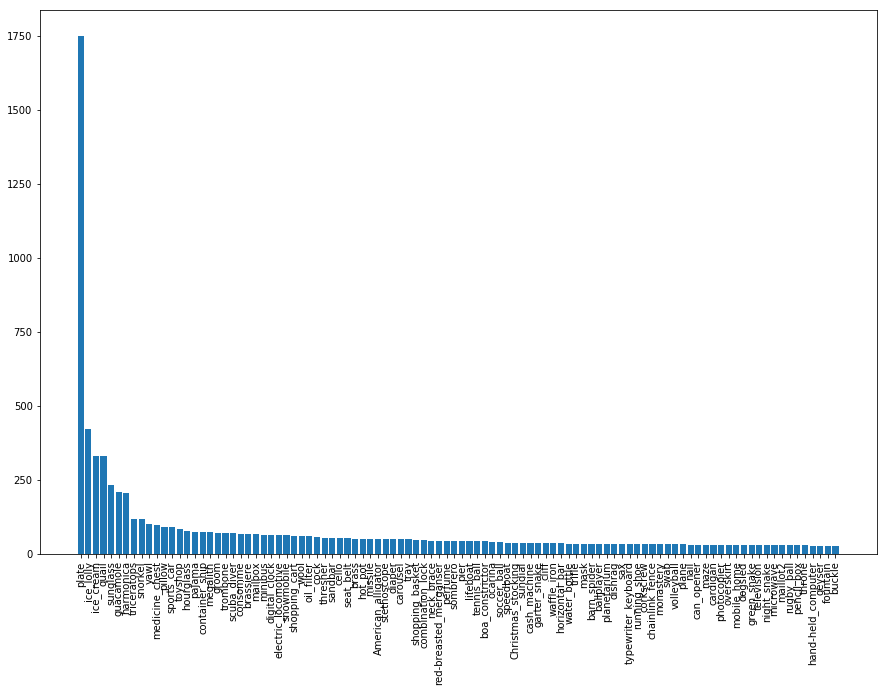

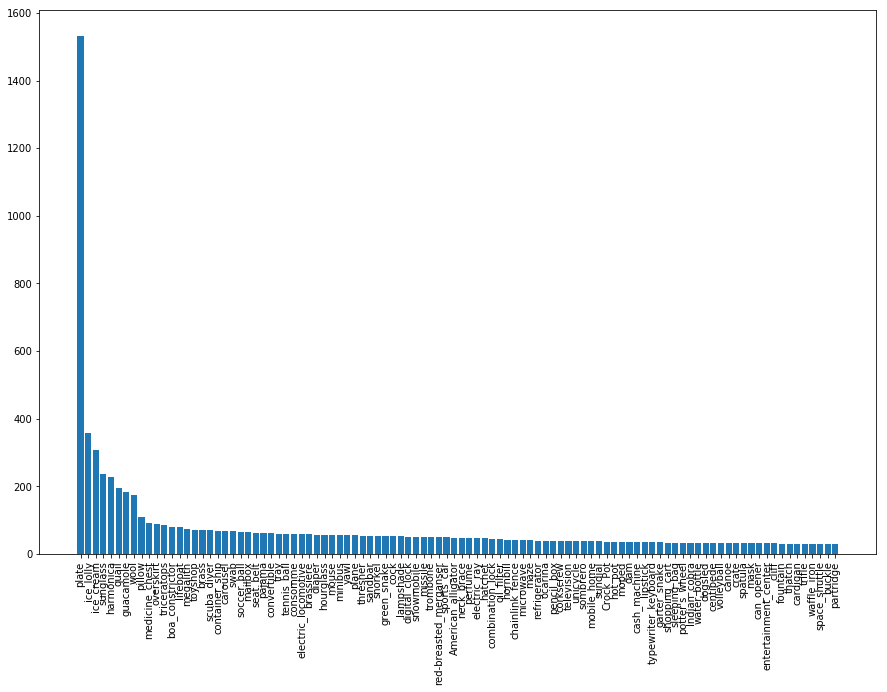

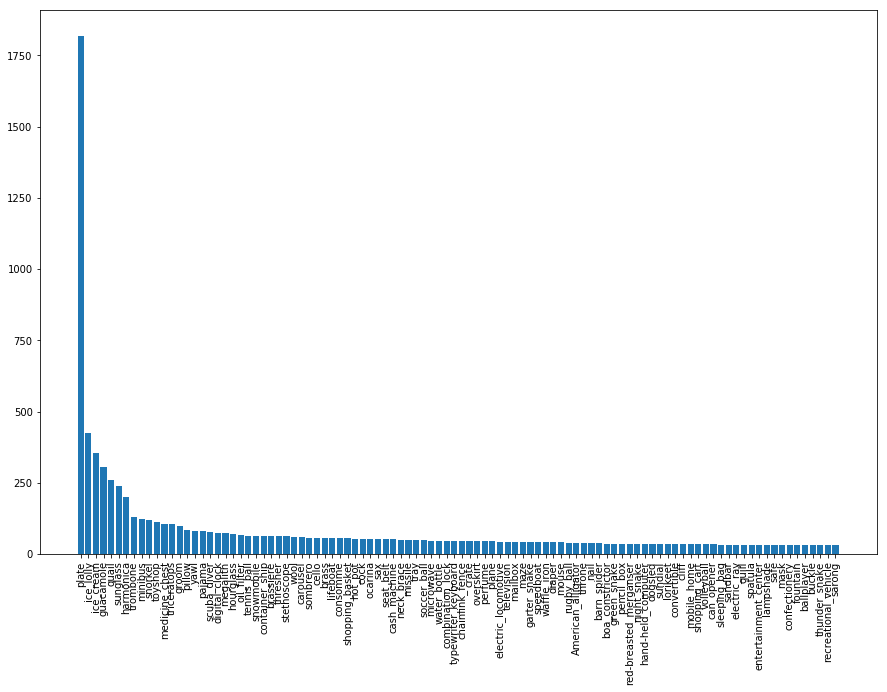

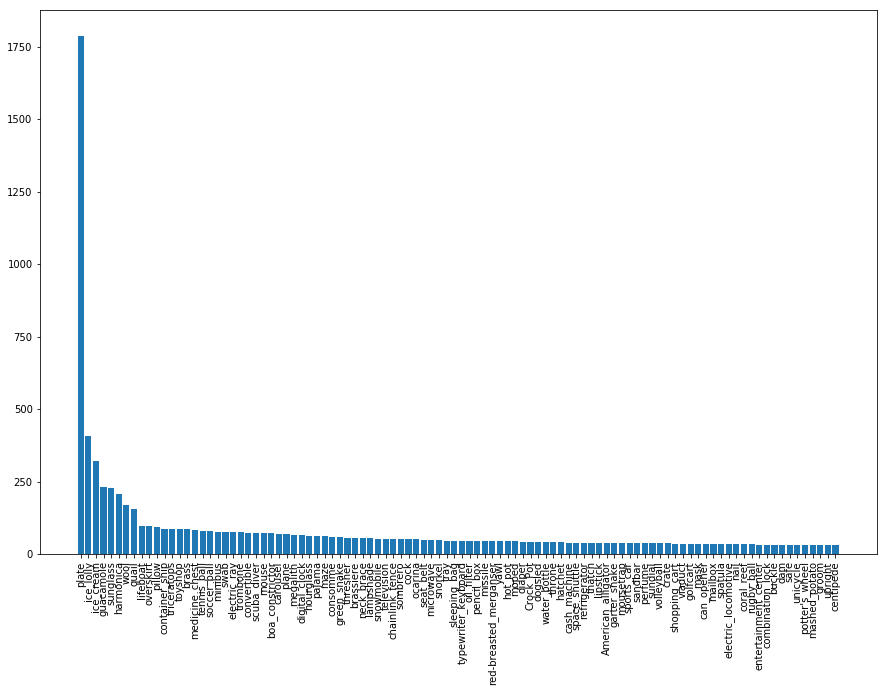

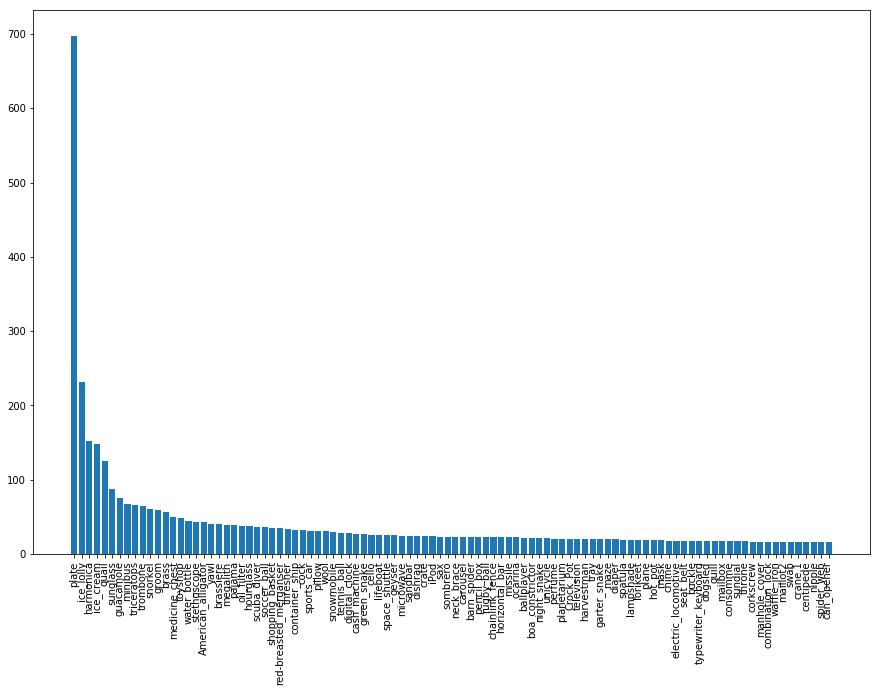

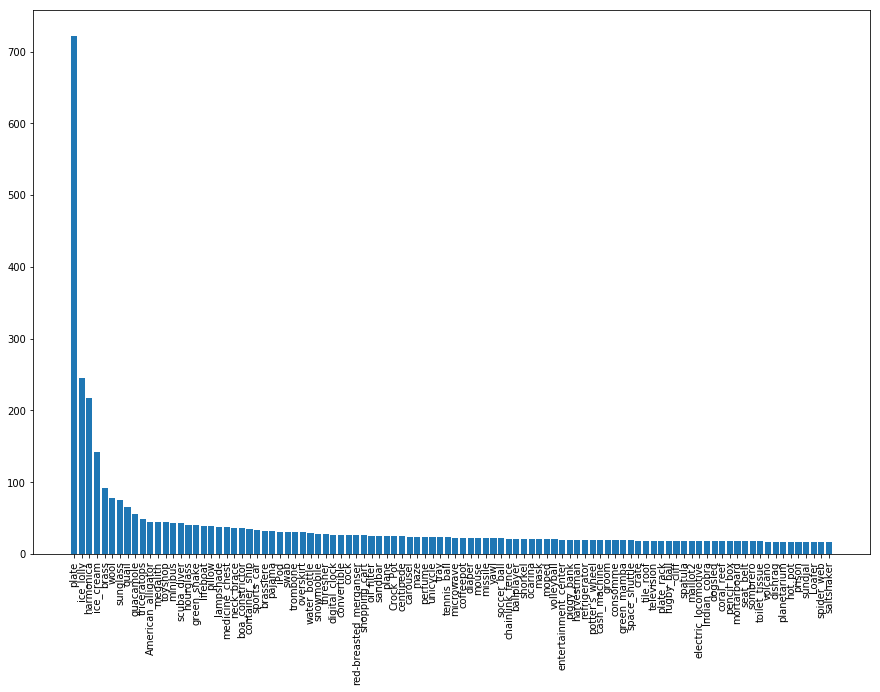

In [13]:
top_n = 200
authors_top_attr_sum = []
authors_top_attr_names = []
for i in range(len(X_dataframes)):
    grouped_sum_instances = X_dataframes[i].groupby('class').sum()
    females_freqs = grouped_sum_instances.loc["female", :]
    males_freqs = grouped_sum_instances.loc["male", :]
    males_freqs = males_freqs.sort_values(ascending=False)
    males_top_n_categories = males_freqs.keys()[:top_n]
    females_freqs = females_freqs.sort_values(ascending=False)
    females_top_n_categories = females_freqs.keys()[:top_n]
    authors_top_attr_sum.append(males_freqs[:top_n])
    authors_top_attr_names.append(males_top_n_categories)
    authors_top_attr_sum.append(females_freqs[:top_n])
    authors_top_attr_names.append(females_top_n_categories)
#     save_plot_sum(males_top_n_categories, males_freqs[:top_n], labels_languages[i] + "_m")
#     save_plot_sum(females_top_n_categories, females_freqs[:top_n], labels_languages[i] + "_f")

Comparando género M en idioma EN con género F en idioma EN
Intersección 168
Comparando género M en idioma EN con género M en idioma ES
Intersección 174
Comparando género M en idioma EN con género F en idioma ES
Intersección 168
Comparando género M en idioma EN con género M en idioma AR
Intersección 168
Comparando género M en idioma EN con género F en idioma AR
Intersección 151
Comparando género F en idioma EN con género M en idioma ES
Intersección 165
Comparando género F en idioma EN con género F en idioma ES
Intersección 178
Comparando género F en idioma EN con género M en idioma AR
Intersección 161
Comparando género F en idioma EN con género F en idioma AR
Intersección 166
Comparando género M en idioma ES con género F en idioma ES
Intersección 178
Comparando género M en idioma ES con género M en idioma AR
Intersección 172
Comparando género M en idioma ES con género F en idioma AR
Intersección 157
Comparando género F en idioma ES con género M en idioma AR
Intersección 168
Comparando g

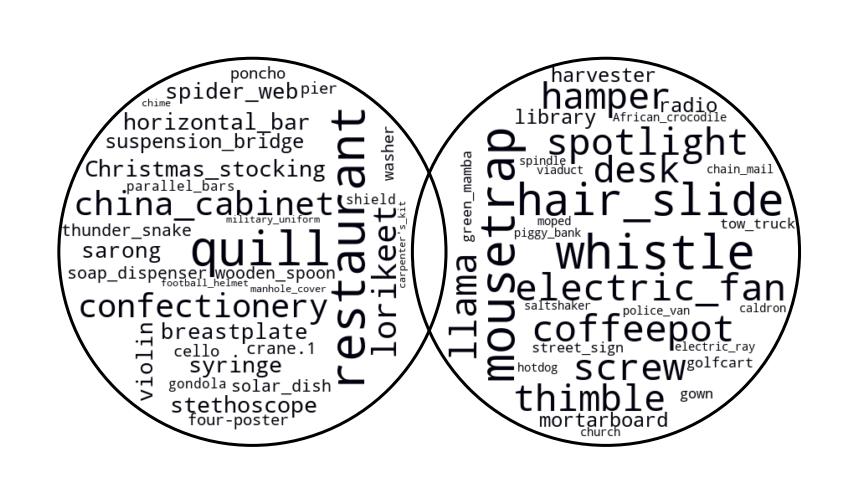

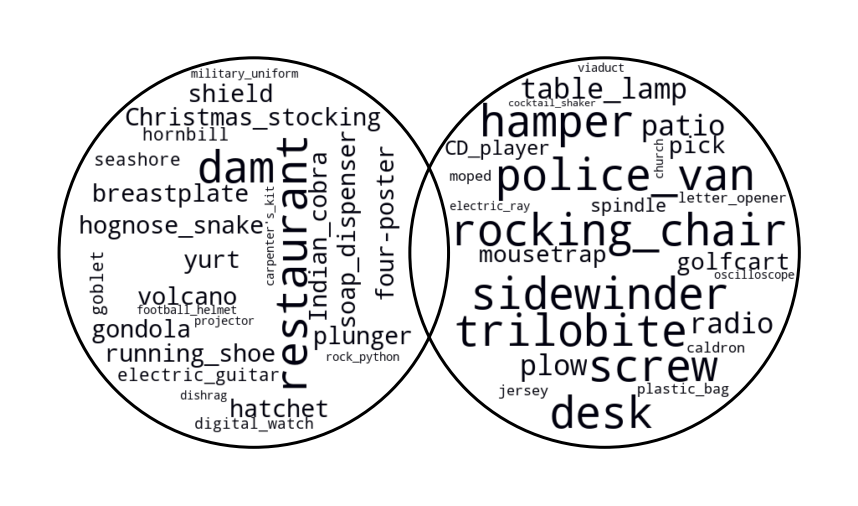

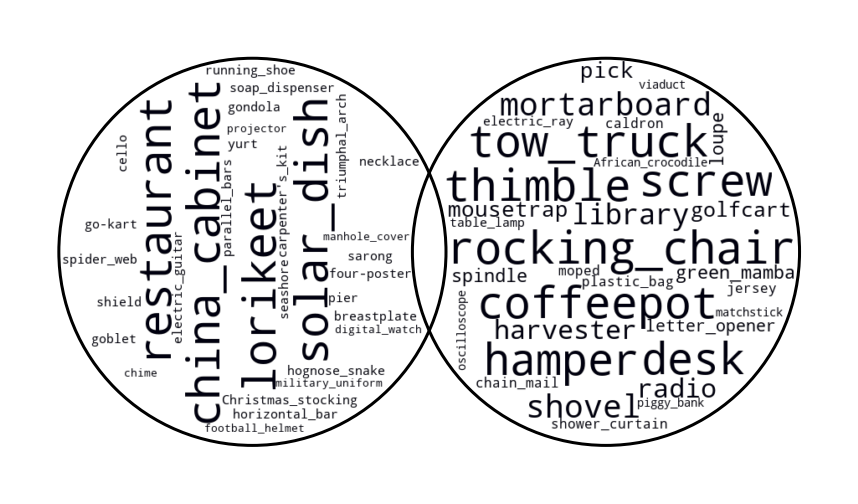

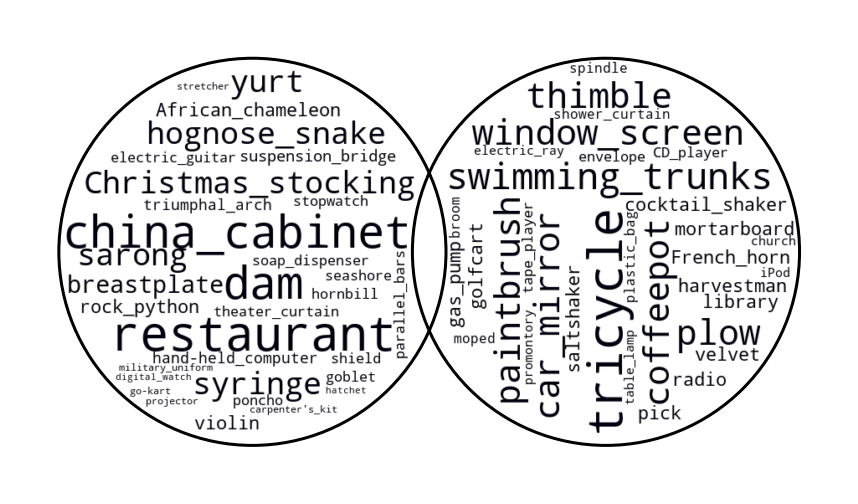

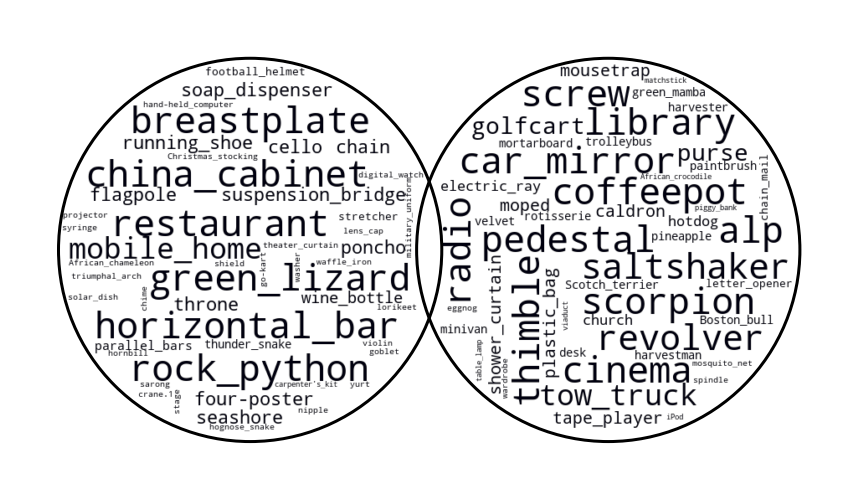

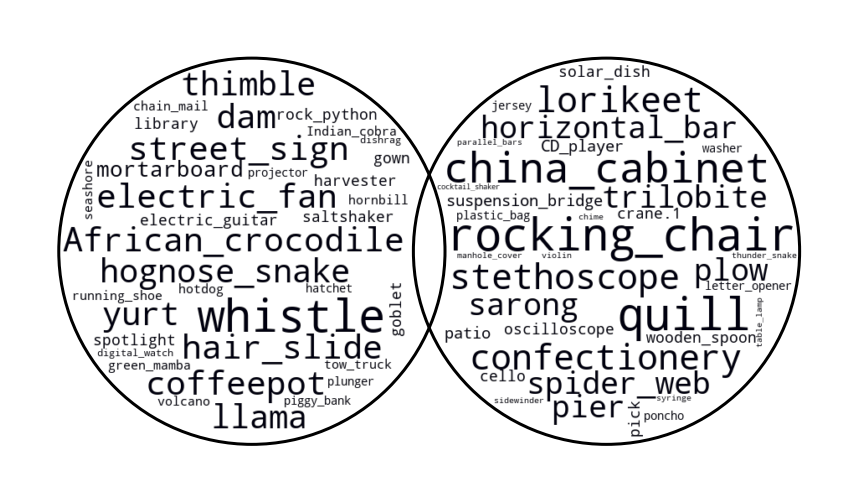

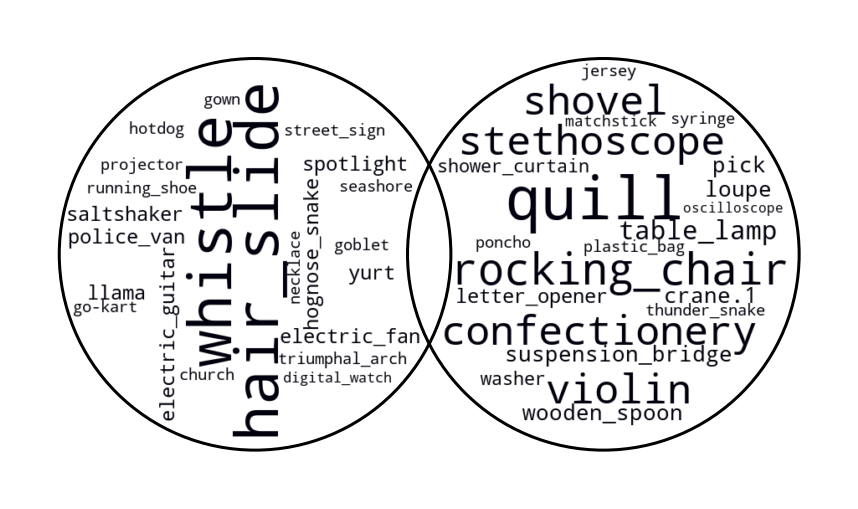

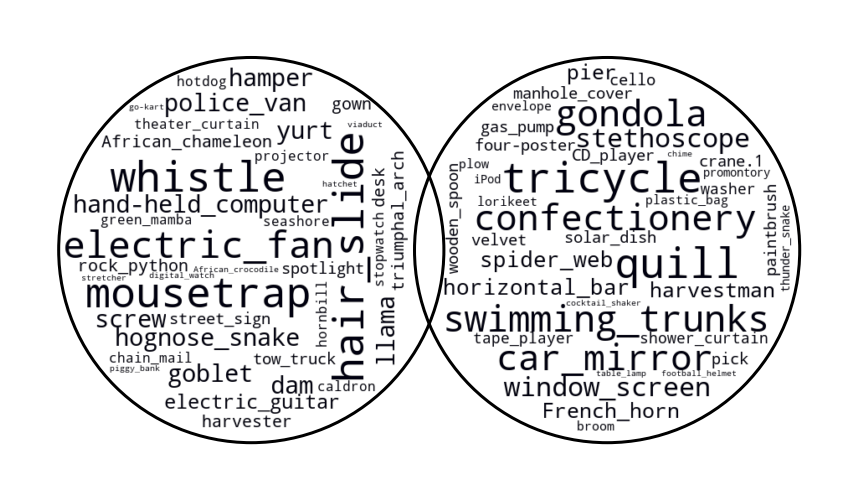

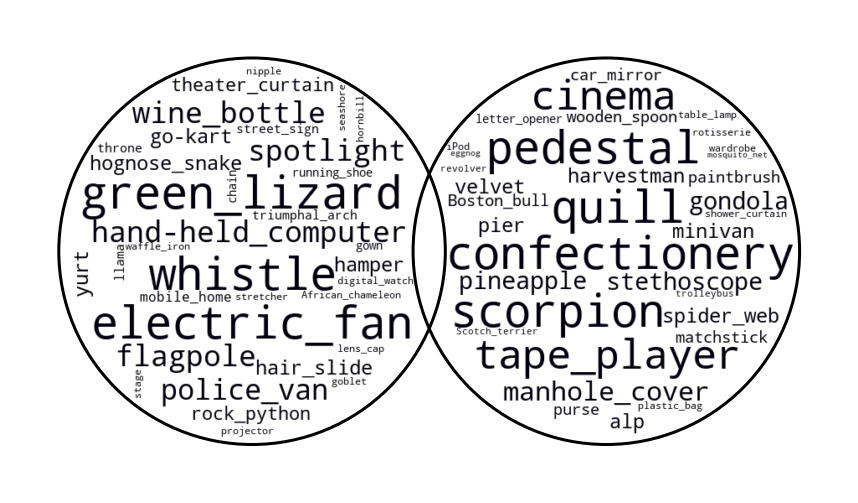

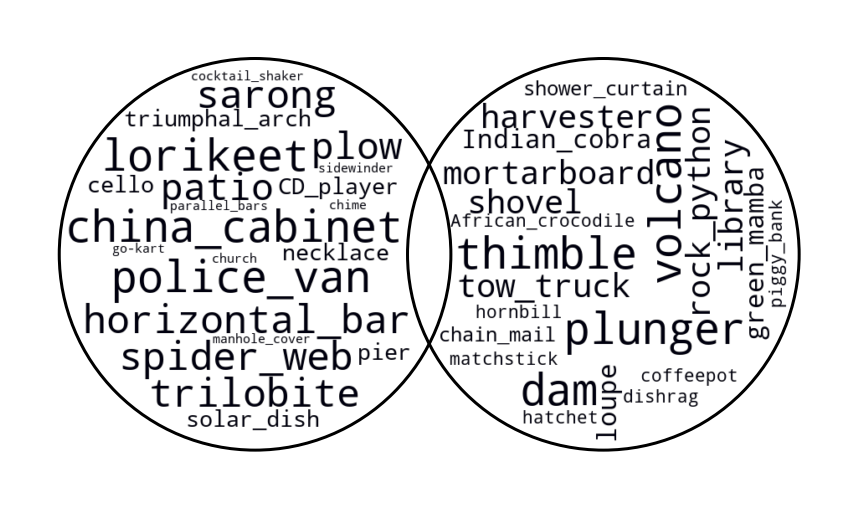

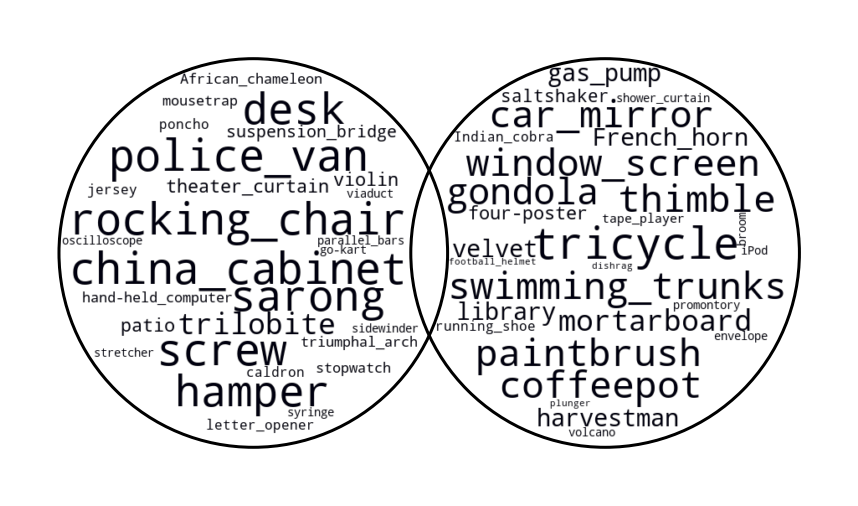

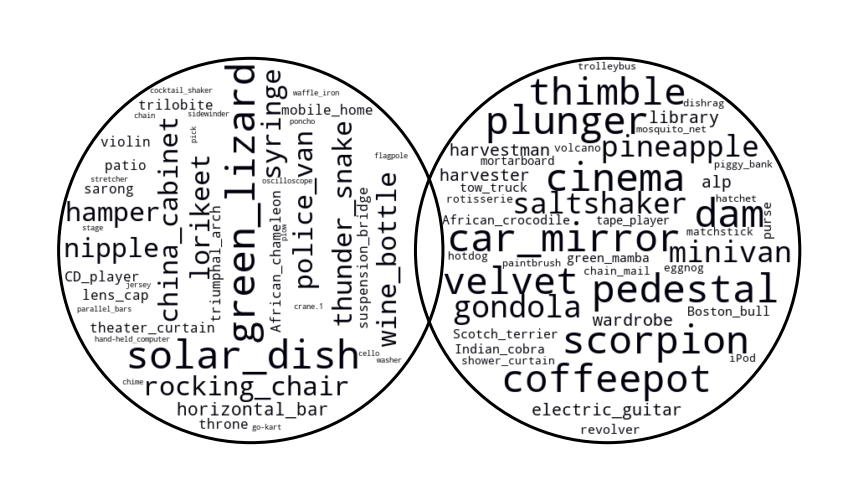

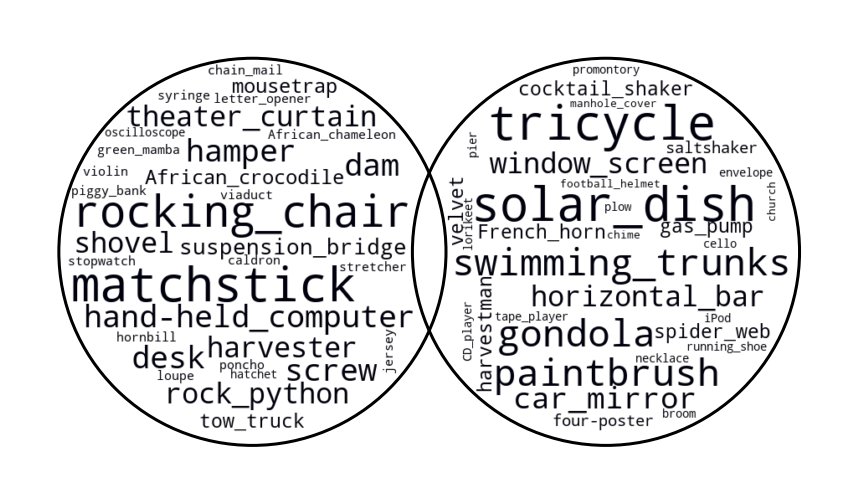

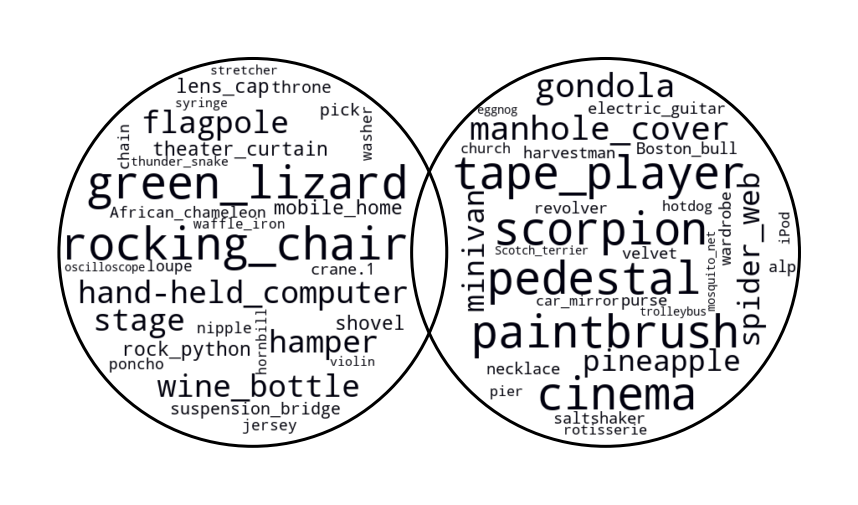

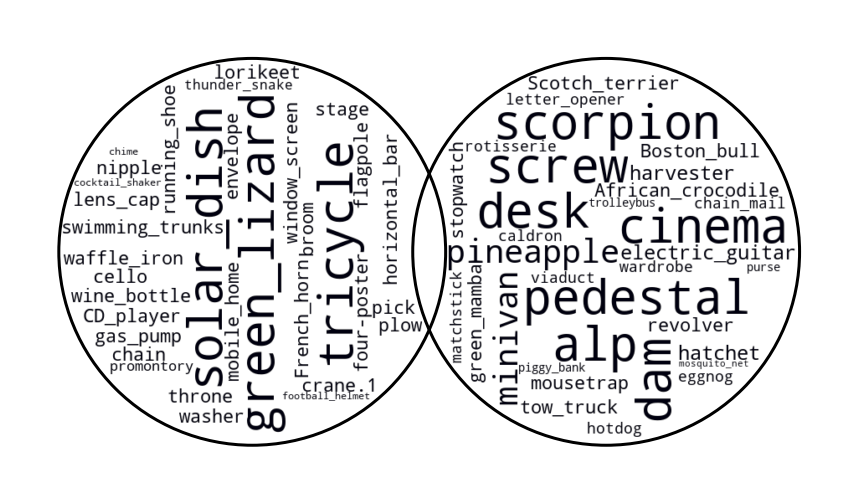

In [15]:
from matplotlib_venn_wordcloud import venn2_wordcloud
labels_languages = ["EN", "EN", "ES", "ES", "AR", "AR"]
all_vocabulary = set()
plt.rcParams['figure.figsize'] = [15, 10]
for i in range(len(authors_top_attr_sum) - 1):
    for j in range(i + 1, len(authors_top_attr_sum)):
        language_a = labels_languages[i]
        genre_a = "M" if i % 2 == 0 else "F"
        language_b = labels_languages[j]
        genre_b = "M" if j % 2 == 0 else "F"
        print("Comparando género {} en idioma {} con género {} en idioma {}".format(genre_a, language_a, genre_b, language_b))
        print("Intersección {}".format(len(set(authors_top_attr_names[i]).intersection(set(authors_top_attr_names[j])))))
        a_categories = [c for c in authors_top_attr_names[i] if c not in authors_top_attr_names[j]]
        b_categories = [c for c in authors_top_attr_names[j] if c not in authors_top_attr_names[i]]
#         print("Atributos idioma {} género {}".format(language_a, genre_a))
#         print(a_categories)
#         print("Atributos idioma {} género {}".format(language_b, genre_b))
#         print(b_categories)
        venn2_wordcloud([set(a_categories + [" "]), set(b_categories + [" "])])